# Part 3 Explore the Location Data
### The dataset contains the 100 most populated metro areas along with the most frequently occuring venue categoies from Foursquare

In [1]:
#import libraries
import requests
import numpy as np
import pandas as pd
import ibm_boto3
import io

In [2]:
# import plotting libraries
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
#Import Venue dataframe
obj = resource.Object(bucket_name=bucket, key='VenueData.json').get()
df = pd.read_json(io.BytesIO(obj['Body'].read()))
df.sort_index(inplace=True)
df.head()

,Metropolitan,Country,Continent,Latitude,Longitude,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,Tokyo,Japan,Asia,35.682839,139.759455,Café,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Lounge,Garden,French Restaurant,Dessert Shop,Thai Restaurant,Steakhouse
1,Delhi,India,Asia,28.651718,77.221939,Indian Restaurant,Bar,Café,Flea Market,Lounge,Asian Restaurant,Ice Cream Shop,South Indian Restaurant,Portuguese Restaurant,Plaza
2,Mexico City,Mexico,North America,19.432601,-99.133342,Mexican Restaurant,Art Museum,Museum,Arts & Crafts Store,Bar,Ice Cream Shop,Boutique,Bakery,Restaurant,Café
3,São Paulo,Brazil,South America,-23.550651,-46.633382,Japanese Restaurant,Brazilian Restaurant,Café,Bakery,Snack Place,Bookstore,Plaza,Cosmetics Shop,Chinese Restaurant,Art Gallery
4,Lagos,Nigeria,Africa,6.455057,3.394179,Lounge,African Restaurant,Café,Bar,Shopping Mall,Hotel,Pizza Place,Art Gallery,Italian Restaurant,Ice Cream Shop


### Which locations have fewer than 10 venue categoies retured from Foursquare?

In [5]:
#See which rows have na values
df_nan = df[df['Category 10'].isna()]
df_nan

,Metropolitan,Country,Continent,Latitude,Longitude,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
16,Tianjin,China,Asia,39.303262,117.416364,Bookstore,National Park,Park,Tour Provider,None,None,None,None,None,None
26,Xi'an,China,Asia,35.000074,104.999927,Business Service,Supermarket,Women's Store,None,None,None,None,None,None,None
29,Changzhou,China,Asia,31.812986,119.969205,Shopping Mall,American Restaurant,History Museum,Italian Restaurant,None,None,None,None,None,None
32,Shantou,China,Asia,23.356377,116.677592,Park,Italian Restaurant,Shopping Mall,None,None,None,None,None,None,None
43,Zhengzhou,China,Asia,34.759188,113.652408,Shopping Mall,Chinese Restaurant,Department Store,Electronics Store,German Restaurant,History Museum,Hotel,Park,None,None
49,Bandung,Indonesia,Asia,-6.934469,107.604954,Museum,Noodle House,Park,Pet Store,Restaurant,None,None,None,None,None
56,Beijing,China,Asia,40.190632,116.412144,Chinese Restaurant,Hot Spring,Museum,Playground,Resort,Ski Area,None,None,None,None
59,Wenzhou,China,Asia,27.995869,120.691579,Bar,Chinese Restaurant,Coffee Shop,Hotel,Indian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Pizza Place,Plaza,None
62,Nanchang,China,Asia,28.679270,115.888599,Lake,Shopping Mall,History Museum,None,None,None,None,None,None,None
63,Yangon,Myanmar,Asia,17.059434,96.113390,Asian Restaurant,Breakfast Spot,Restaurant,River,None,None,None,None,None,None


### How many of the top 100 metro areas are in each continent?

In [6]:
#Count metro areas by Continent
df1 = pd.DataFrame({'Continent':df.Continent, 'Count':df.Metropolitan})
df1 = df1.groupby(['Continent']).count().sort_values(by=['Count'], ascending=False)

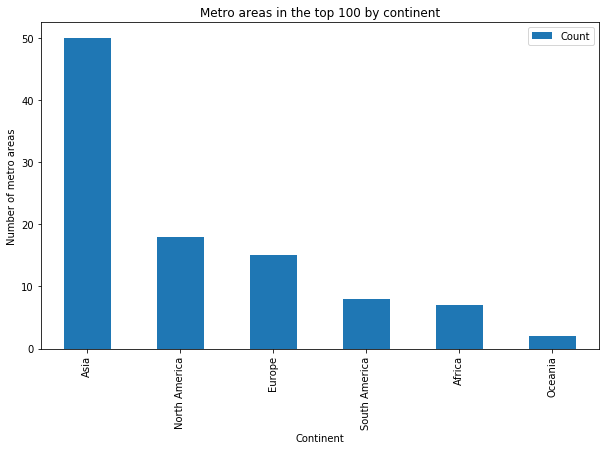

In [7]:
df1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Continent') # add to x-label to the plot
plt.ylabel('Number of metro areas') # add y-label to the plot
plt.title('Metro areas in the top 100 by continent') # add title to the plot
plt.show()

### How many of the top metro areas are in each country?
Only those countries with more than 1 metro area are included in the plot

In [8]:
#Count metro areas by country
df2 = pd.DataFrame({'Country':df.Country, 'Count':df.Metropolitan})
df2 = df2.groupby(['Country']).count().sort_values(by=['Count'], ascending=False)
df2

,Count
Country,
China,21
United States,14
India,9
Germany,6
Mexico,3
Brazil,3
Indonesia,3
Japan,3
South Korea,2


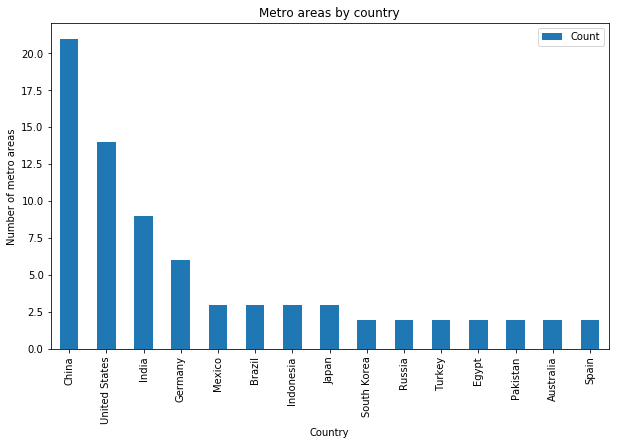

In [9]:
df2[df2['Count']>1].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Country') # add to x-label to the plot
plt.ylabel('Number of metro areas') # add y-label to the plot
plt.title('Metro areas by country') # add title to the plot
plt.show()

### Category 1 contains the venue category that was returned most often for each metro area
### Which venue types occured most often for Category 1?
Only categories that occured at least twice are shown.

In [10]:
#Count #1 top venue category
df3 = pd.DataFrame({'Top Venue':df['Category 1'], 'Count':df.Metropolitan})
df3 = df3.groupby(['Top Venue']).count().sort_values(by=['Count'], ascending=False)
df3 = df3[df3['Count']>1]
df3

,Count
Top Venue,
Café,14
Coffee Shop,10
Shopping Mall,10
Indian Restaurant,8
Bar,7
Chinese Restaurant,5
Italian Restaurant,4
Park,4
Mexican Restaurant,3


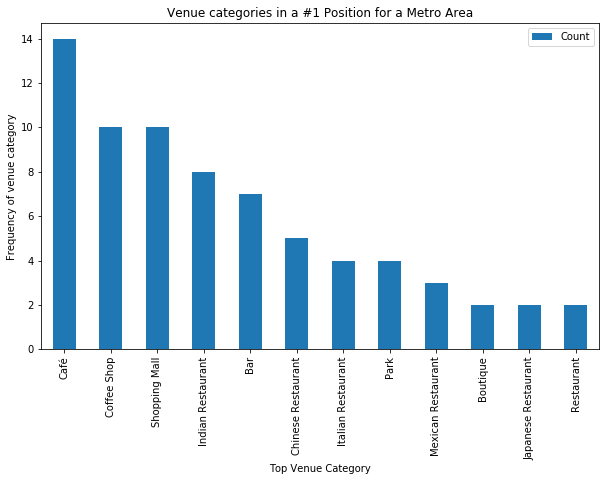

In [11]:
df3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Top Venue Category') # add to x-label to the plot
plt.ylabel('Frequency of venue category') # add y-label to the plot
plt.title('Venue categories in a #1 Position for a Metro Area') # add title to the plot
plt.show()

### How many times does each venue category occur in the dataset?
Only those that occured 10 or more times are shown.

In [12]:
#Count how many times each venue category occurs in the dataframe
df4 = pd.DataFrame()
df_cols = df.iloc[:,range(5,15)]
#df_cols = df_cols.reset_index(drop=True)
#Loop through category columns
for col, content in df_cols.items():
    df5 = pd.DataFrame({'Venue':df_cols[col], 'Count':df_cols.index})
    df5 = df5.groupby(['Venue']).count().sort_values(by=['Count'], ascending=False)
    df4 = df4.append(df5)
df4 = df4.groupby(['Venue']).sum().sort_values(by=['Count'], ascending=False)
df5 = df4[df4['Count']>9]
df5

,Count
Venue,
Coffee Shop,60
Café,57
Park,34
Restaurant,29
Italian Restaurant,29
Ice Cream Shop,28
Plaza,28
Chinese Restaurant,26
Bar,26


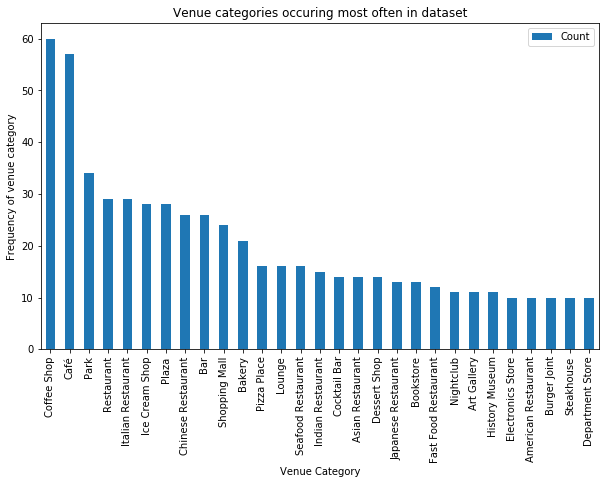

In [13]:
df5.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Frequency of venue category') # add y-label to the plot
plt.title('Venue categories occuring most often in dataset') # add title to the plot
plt.show()

### Look at how many categoies occured once, twice, three times, etc.

In [14]:
dfcc = pd.DataFrame({'Number of Occurances':df4['Count'], 'Count of venue categories':df4.iloc[:,0]})

dfcc = dfcc.groupby(dfcc['Number of Occurances']).count().sort_values(by=['Number of Occurances'])
dfcc

,Count of venue categories
Number of Occurances,
1,65
2,24
3,14
4,12
5,4
6,7
7,4
8,4
9,4


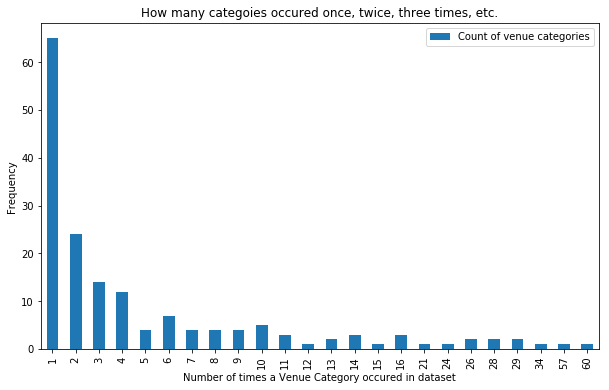

In [15]:
dfcc.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Number of times a Venue Category occured in dataset') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('How many categoies occured once, twice, three times, etc.') # add title to the plot
plt.show()